In [ ]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("/content/synthetic_student_burnout_data.csv")

print(df.head())
print(df.info())

   LMS_Login_Frequency_Per_Week  Assignment_Delay_Days  \
0                           6.0                      1   
1                           5.0                      1   
2                           6.0                      2   
3                           8.0                      3   
4                           5.0                      3   

   Attendance_Rate_Percentage  Study_Consistency_Index  \
0                       91.43                     0.99   
1                       86.94                     0.73   
2                       64.60                     0.95   
3                       87.79                     0.83   
4                       77.66                     0.90   

   Feedback_Sentiment_Score  CAT_Marks_Trend  Late_Night_Activity_Ratio  \
0                     -0.38            13.69                       0.41   
1                      0.75            11.60                       0.85   
2                      0.56            -9.92                       0.16   
3 

In [ ]:
# Step 3: Encode Target
le = LabelEncoder()
df["Burnout_Risk_Level"] = le.fit_transform(df["Burnout_Risk_Level"])

# Mapping:
# Low = 0
# Medium = 1
# High = 2

print(df["Burnout_Risk_Level"].value_counts())

Burnout_Risk_Level
1    1482
2     445
0      73
Name: count, dtype: int64


In [ ]:
# Step 4: Define X and y

X = df.drop("Burnout_Risk_Level", axis=1)
y = df["Burnout_Risk_Level"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Step 5: Train Model

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [ ]:
# Step 6: Predictions

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9875

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.99      1.00      1.00       301
           2       0.98      0.97      0.97        89

    accuracy                           0.99       400
   macro avg       0.99      0.92      0.95       400
weighted avg       0.99      0.99      0.99       400


Confusion Matrix:

[[  8   0   2]
 [  0 301   0]
 [  0   3  86]]


In [ ]:
# Step 7: Risk Score Generation

probabilities = model.predict_proba(X_test)

# Take highest probability per student
risk_scores = np.max(probabilities, axis=1) * 100

print(risk_scores[:10])

[90.78888564 99.38574958 80.65481477 71.45042351 61.18232449 90.86323741
 64.13683716 92.63031569 99.49673038 73.85418198]


In [ ]:
def categorize_risk(score):
    if score >= 70:
        return "High"
    elif score >= 40:
        return "Medium"
    else:
        return "Low"

risk_categories = [categorize_risk(score) for score in risk_scores]

print(risk_categories[:10])

['High', 'High', 'High', 'High', 'Medium', 'High', 'Medium', 'High', 'High', 'High']


In [ ]:
# Step 8: Feature Importance

importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

                        Feature  Importance
5               CAT_Marks_Trend    0.283208
2    Attendance_Rate_Percentage    0.281004
4      Feedback_Sentiment_Score    0.279906
0  LMS_Login_Frequency_Per_Week    0.062257
1         Assignment_Delay_Days    0.052053
3       Study_Consistency_Index    0.021556
6     Late_Night_Activity_Ratio    0.020016


**Feature Importance Bar Chart**

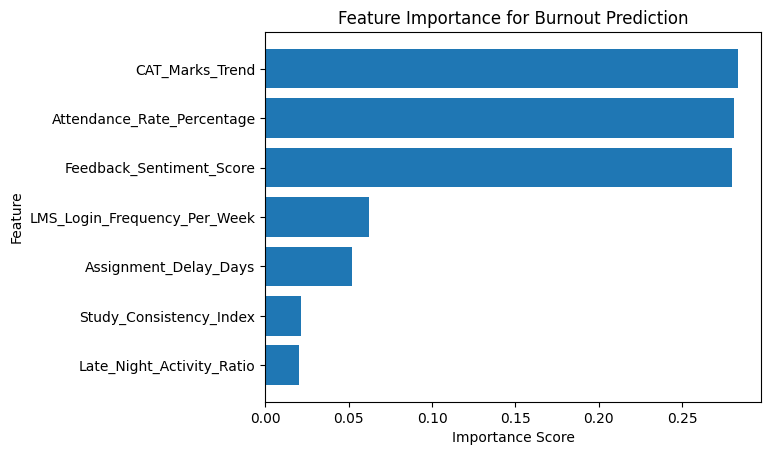

In [ ]:
import matplotlib.pyplot as plt

# Sort importance (already sorted but ensuring again)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=True
)

plt.figure()
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Burnout Prediction")
plt.show()

**Risk Distribution Chart**

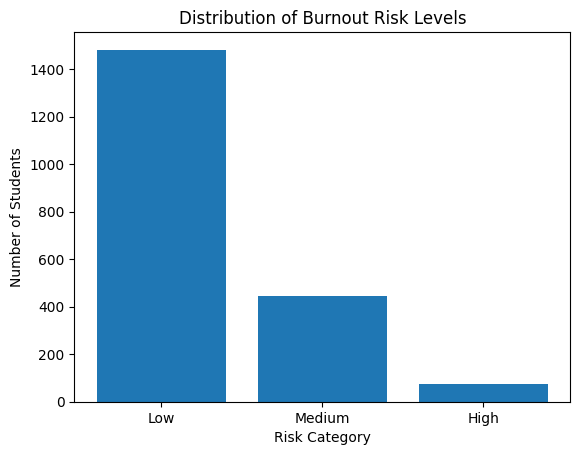

In [ ]:
# Convert encoded labels back to original names
df["Risk_Label"] = le.inverse_transform(df["Burnout_Risk_Level"])

risk_counts = df["Risk_Label"].value_counts()

plt.figure()
plt.bar(
    risk_counts.index,
    risk_counts.values
)

plt.xlabel("Risk Category")
plt.ylabel("Number of Students")
plt.title("Distribution of Burnout Risk Levels")
plt.show()

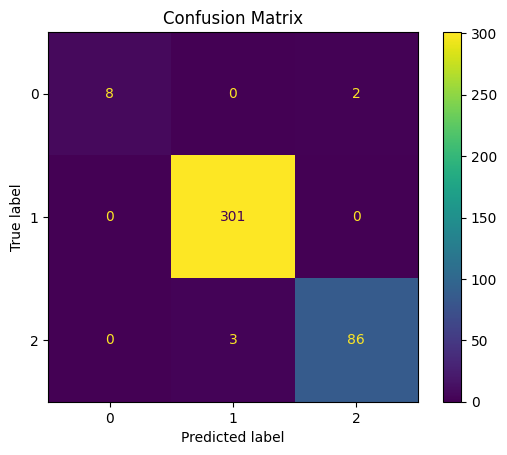

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib
import os

# Create the directory if it doesn't exist
os.makedirs("../dashboard", exist_ok=True)

joblib.dump(model, "../dashboard/burnout_model.pkl")

['../dashboard/burnout_model.pkl']

In [ ]:
from google.colab import files

files.download("../dashboard/burnout_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>